# Empircally Testing the Birthday Paradox

In [97]:
import pandas as pd
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import math

### This dataset is the number of birthdays in the U.S. each day of the year 1978. 

In [36]:
df = pd.read_csv('birthday.csv', names = ['Date', 'Quantity'])

In [37]:
df.head()

,Date,Quantity
0,1/1/78,7701
1,1/2/78,7527
2,1/3/78,8825
3,1/4/78,8859
4,1/5/78,9043


We can get rid of the dates column and just use the index to represent the days of the year.

In [38]:
del df['Date']

In [39]:
df.head()

,Quantity
0,7701
1,7527
2,8825
3,8859
4,9043


### Let us calculate the probability that two people share the same birthday in the dataset

In [60]:
B = df['Quantity'].sum() #total number of birthdays in the dataset
B

3333239

In [93]:
birthdays = np.array([], np.int32)
for day,row in df.iterrows():
    birthdays = np.concatenate((birthdays,np.full(row[0], day)))

In [74]:
len(birthdays)

3333239

I'll define a function, hasMatch, that will check whether a selection of individuals share the same birthday.

In [86]:
def hasMatch(array):
    array2 = pd.Series(array)
    binaryMap = array2.duplicated()
    if(binaryMap.sum()>=1):
        return True
    else:
        return False

Now to run the trials. The following loop will calculate the probability of at least 2 people sharing the same birthday from a selection of n people for n=2 to n=100. For each n, N trials will be ran. 

In [99]:
%%time
dist = []
N = 100000
for n in range(2,100):
    matches = 0.0;
    for i in range(0,N): # run trial N times
        selections = []
        for j in range(n): # select n random people
            x = birthdays[rd.randint(0,B-1)]
            selections.append(x)
        if(hasMatch(selections)):
            matches += 1.0
    dist.append(matches/N)

CPU times: user 1h 21min 31s, sys: 16.6 s, total: 1h 21min 48s
Wall time: 1h 25min 44s


dist is the probability distribution formed from the dataset and Dist will be the theoretical probability distribution 

In [104]:
Dist = []
for n in range(2,100):
    Dist.append(1 - (math.factorial(365))/(math.factorial(365-n)*(365**n)))

### Plotting the theoretical and actual distributions

In [105]:
plt.rcParams["figure.figsize"] = (30,10)

In [106]:
x = np.arange(2,100)

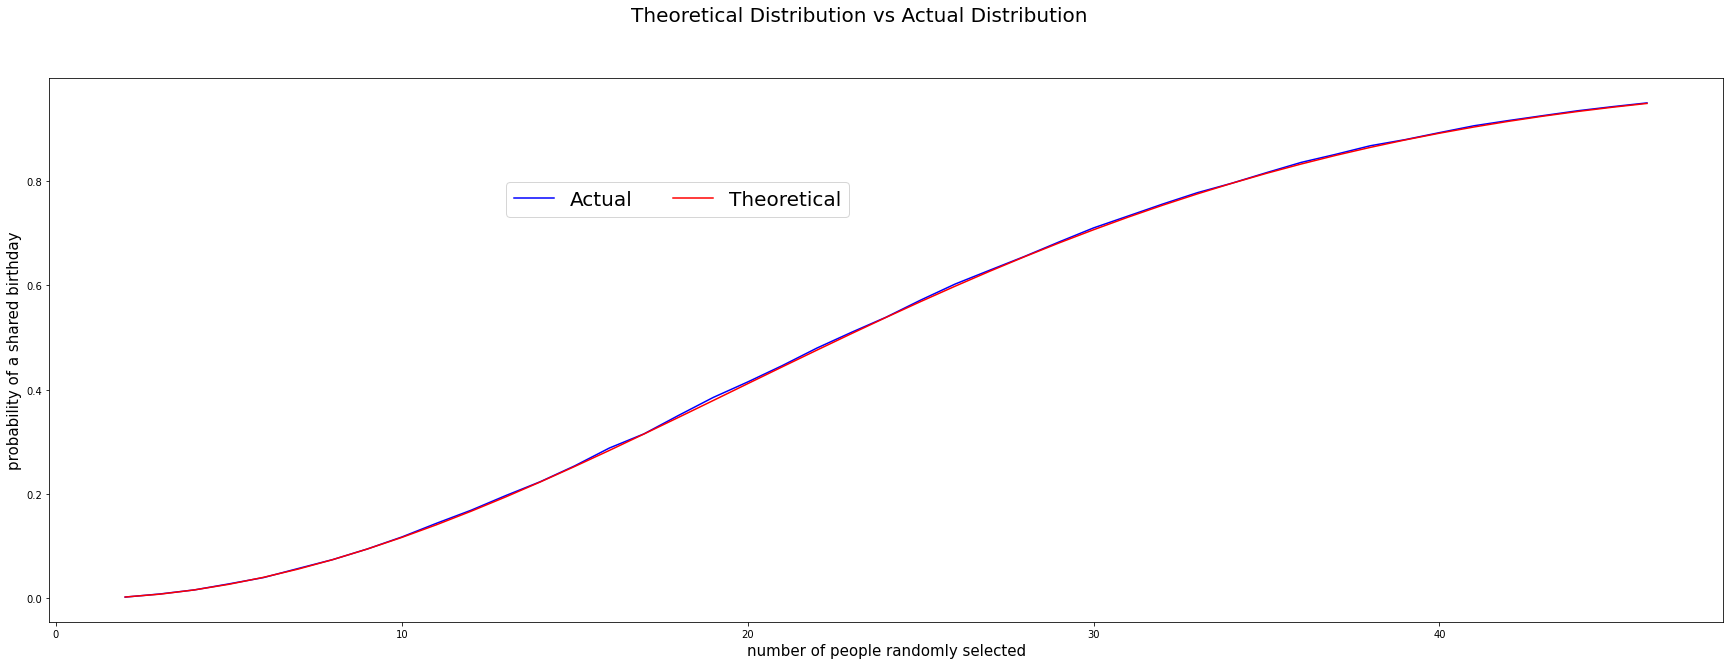

In [144]:
plt.suptitle('Theoretical Distribution vs Actual Distribution', fontsize = 20)
plt.xlabel('number of people randomly selected', fontsize = 15)
plt.ylabel('probability of a shared birthday', fontsize = 15)
plt.plot(x[:len(x)-53],dist[:len(dist)-53],'b')
plt.plot(x[:len(x)-53],Dist[:len(Dist)-53], 'r')
plt.figlegend( ('Actual', 'Theoretical'), bbox_to_anchor=(0.5, 0.75), ncol = 2, fontsize = 20)

It's pretty close, but there are some slight deviations of the actual distribution from the theoretical one. In other words, the assumption in calculating the theoretical distribution that the distribution of birthdays in the year is uniform, is false. Let's compare the theoretical and actual distribution of birthdays in the year.

### Distribution of Birthdays in 1978

In [140]:
birthdaysDist = df['Quantity']/df['Quantity'].sum()

In [141]:
tBirthdayDist = [1.0/365]*365

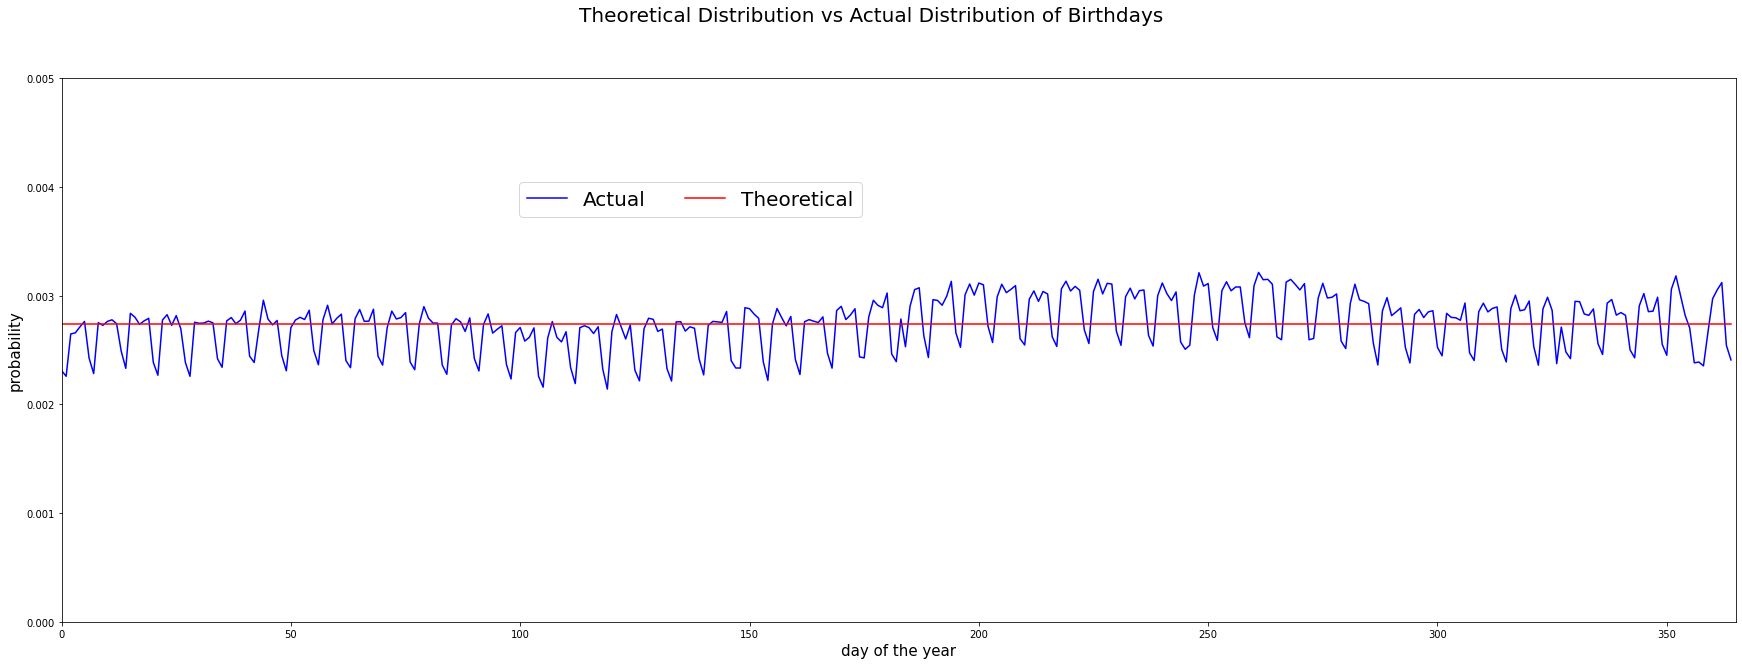

In [151]:
plt.xlim(0,365)
plt.ylim(0,0.005)
plt.suptitle('Theoretical Distribution vs Actual Distribution of Birthdays', fontsize = 20)
plt.xlabel('day of the year', fontsize = 15)
plt.ylabel('probability', fontsize = 15)
plt.plot(np.arange(0,365),birthdaysDist, 'b')
plt.plot(np.arange(0,365),tBirthdayDist, 'r')
plt.figlegend( ('Actual', 'Theoretical'), bbox_to_anchor=(0.5, 0.75), ncol = 2, fontsize = 20)